In [1]:
!pwd

/home/pseudocodenerd/Desktop/code/phoenix/ml


In [195]:
import csv
import pandas as pd

In [5]:
modis_usa = pd.read_csv("pre_data/MODIS_C6_USA_contiguous_and_Hawaii_7d.csv")
modis_usa.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,39.884,-78.246,300.3,1.4,1.2,2020-09-26,255,T,24,6.0NRT,284.0,10.4,N
1,18.639,-96.216,308.0,1.4,1.2,2020-09-26,425,T,73,6.0NRT,291.3,10.4,N
2,40.595,-105.702,303.1,1.9,1.4,2020-09-26,435,T,53,6.0NRT,278.5,23.4,N
3,40.696,-105.729,322.6,1.9,1.3,2020-09-26,435,T,77,6.0NRT,283.9,54.7,N
4,40.705,-105.718,321.3,1.9,1.3,2020-09-26,435,T,39,6.0NRT,282.8,49.1,N


In [16]:
modis_txt_test = pd.read_csv("pre_data/FIRMS/c6/USA_contiguous_and_Hawaii/MODIS_C6_USA_contiguous_and_Hawaii_MCD14DL_NRT_2020217.txt", 
                             names=['Latitude', 'Longitude', 'Brightness', 'Scan', 'TRACK', 'acq_data', 'acq_time', 'satellite', 'confidence', 'version',
                                   'bright', 'FIRE RADIATIVE POWER', 'day or night'], skiprows=1, sep=',')

### Attributes of each MODIS text file
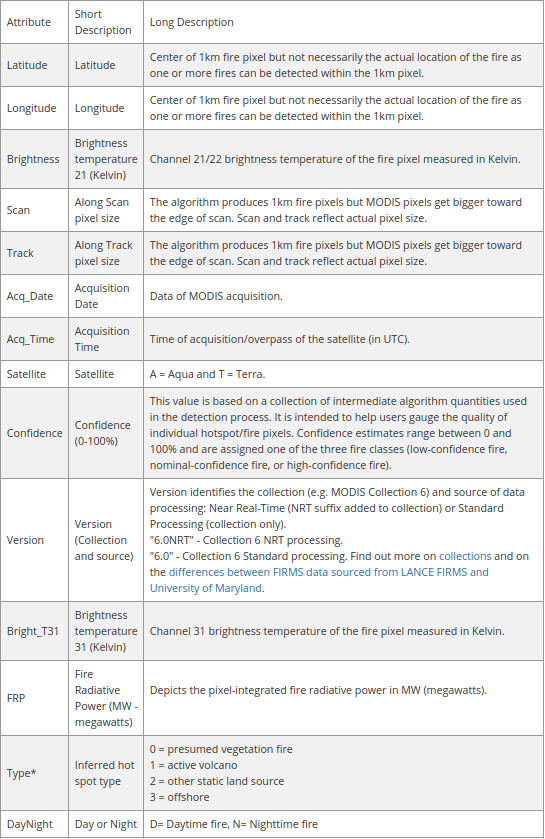

In [17]:
modis_txt_test.head(15)

,Latitude,Longitude,Brightness,Scan,TRACK,acq_data,acq_time,satellite,confidence,version,bright,FIRE RADIATIVE POWER,day or night
0,29.754,-95.019,315.7,1.4,1.2,2020-08-04,04:10,T,92,6.0NRT,293.2,16.6,N
1,29.761,-95.011,308.4,1.4,1.2,2020-08-04,04:10,T,74,6.0NRT,294.4,8.7,N
2,30.944,-88.013,308.1,1.2,1.1,2020-08-04,04:10,T,72,6.0NRT,295.3,8.3,N
3,31.150,-87.985,305.9,1.2,1.1,2020-08-04,04:10,T,66,6.0NRT,295.8,6.5,N
4,33.441,-88.569,304.4,1.2,1.1,2020-08-04,04:10,T,60,6.0NRT,293.8,6.0,N
5,18.286,-88.310,309.4,1.0,1.0,2020-08-04,04:10,T,76,6.0NRT,292.8,6.7,N
6,27.041,-85.941,310.7,1.3,1.1,2020-08-04,04:10,T,72,6.0NRT,296.4,9.5,N
7,29.757,-95.004,336.0,1.4,1.2,2020-08-04,04:10,T,100,6.0NRT,295.0,56.4,N
8,36.096,-93.165,301.0,1.0,1.0,2020-08-04,04:15,T,35,6.0NRT,287.1,6.0,N
9,36.463,-92.042,302.2,1.0,1.0,2020-08-04,04:15,T,47,6.0NRT,290.1,5.1,N


### to get 5 year data of US fire MODIS data

In [54]:
us_cities = [
    "Phoenix",
    "San+Diego",
    "San+Hose",
    "Oregon",
    "Los+Angeles",
    "New+Orleans"
]

In [64]:
import json
with open('pre_data/fire_archive_M6_157498.json') as src:
    data = json.load(src)
print(data[0])
print(data[-1])
with open('pre_data/fire_nrt_M6_157498.json') as src:
    data = json.load(src)
print(data[0])
print(data[-1])

{'latitude': 19.4537, 'longitude': -154.9889, 'acq_date': '2015-03-01', 'acq_time': '0025', 'confidence': '33', 'instrument': 'MODIS', 'brightness': 310.5, 'satellite': 'Aqua', 'daynight': 'D', 'frp': 48, 'bright_t31': 290.3, 'version': '6.03', 'scan': 4.2, 'track': 1.9, 'type': '1'}
{'latitude': 21.493, 'longitude': -158.1153, 'acq_date': '2020-06-30', 'acq_time': '2355', 'confidence': '72', 'instrument': 'MODIS', 'brightness': 330.7, 'satellite': 'Aqua', 'daynight': 'D', 'frp': 20.9, 'bright_t31': 307.3, 'version': '6.03', 'scan': 1, 'track': 1, 'type': '0'}
{'latitude': 36.78, 'longitude': -92.806, 'acq_date': '2020-07-01', 'acq_time': '0425', 'track': 1.1, 'scan': 1.1, 'version': '6.0NRT', 'bright_t31': 293.6, 'frp': 7, 'daynight': 'N', 'brightness': 307, 'instrument': 'MODIS', 'satellite': 'Terra', 'confidence': '70'}
{'latitude': 20.949, 'longitude': -156.641, 'acq_date': '2020-09-30', 'acq_time': '2110', 'track': 1, 'scan': 1, 'version': '6.0NRT', 'bright_t31': 296.5, 'frp': 14.

In [227]:
import pandas as pd
a = pd.date_range(start='1/1/2016', periods=57, freq='M')
# print(a)
end_dates = pd.Series(a.format())
# print(end_dates)
b = pd.date_range(start='1/1/2016', periods=57, freq='MS')
start_dates = pd.Series(b.format())

In [228]:
len(end_dates)

57

In [269]:
import requests
def get_weather(city):
    city_dat = []
    dates, temp, wind, precip, pressure, heat = [], [] ,[], [], [], []
    for i in range(len(start_dates)):
        res_str = f'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=7b7c4ad8a29e48c3a51114119200310&q={city}&format=json&date={start_dates[i]}&enddate={end_dates[i]}'
#         res_str = f'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=7b7c4ad8a29e48c3a51114119200310&q={lat},{lon}&format=json&date={start_dates[i]}&enddate={end_dates[i]}'

        city_dat.append(res_str)
#     print(city_dat[0])
        res = requests.get(res_str).json()['data']['weather']
        for j in range(len(res)):
            dates.append(res[j]['date'])
            temp.append(res[j]['avgtempC'])
            wind.append(res[j]['hourly'][4]['windspeedKmph'])
            precip.append(res[j]['hourly'][4]['precipMM'])
            pressure.append(res[j]['hourly'][4]['pressure'])
            heat.append(res[j]['hourly'][4]['HeatIndexC'])
    city_df = pd.DataFrame({
        "Dates":dates,
        "Temperature": temp,
        "Wind Speed": wind,
        "Precipitation": precip,
        "Pressure": pressure,
        "Heat Index": heat
    })
    city_df.to_csv(f'{city}.csv')
#     city_df.to_csv('mississippi_region_basin.csv')
    print("OK")

In [270]:
# test
get_weather('Seattle')

OK


In [272]:
phoenix_weather_data = pd.read_csv('Seattle.csv')
phoenix_weather_data.head()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2016-01-01,1,5,0.0,1029,7
1,1,2016-01-02,0,4,0.0,1023,6
2,2,2016-01-03,1,7,0.0,1017,5
3,3,2016-01-04,3,12,0.1,1017,6
4,4,2016-01-05,3,5,0.0,1003,5


In [62]:
for i in range(1, len(us_cities)):
    get_weather(us_cities[i])

OK
OK
OK
OK
OK


### city weather data done

archives fire data from `2015-03-01` to `2020-06-30`


near_real_time (nrt) data from `2020-07-01` to `2020-09-30`

In [3]:
# see data by nasa in json
modis_usa_archives = pd.read_json('pre_data/fire_archive_M6_157498.json', encoding="utf-8")
modis_usa_nrt = pd.read_json('pre_data/fire_nrt_M6_157498.json', encoding="utf-8")

In [68]:
modis_usa_archives.head(-1)

,latitude,longitude,acq_date,acq_time,confidence,instrument,brightness,satellite,daynight,frp,bright_t31,version,scan,track,type
0,19.4537,-154.9889,2015-03-01,25,33,MODIS,310.5,Aqua,D,48.0,290.3,6.03,4.2,1.9,1
1,19.4140,-155.2819,2015-03-01,1236,100,MODIS,327.6,Aqua,N,94.8,284.9,6.03,2.3,1.5,1
2,19.4101,-155.2605,2015-03-01,1236,90,MODIS,316.3,Aqua,N,56.1,284.6,6.03,2.3,1.5,1
3,19.4120,-155.2772,2015-03-01,1236,100,MODIS,342.6,Aqua,N,170.3,285.9,6.03,2.3,1.5,1
4,26.6062,-80.9052,2015-03-01,1835,76,MODIS,321.4,Aqua,D,12.7,297.6,6.03,1.1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681548,39.5034,-107.8907,2020-06-30,2042,89,MODIS,339.4,Aqua,D,55.5,310.9,6.03,1.5,1.2,0
681549,39.5017,-107.9083,2020-06-30,2042,80,MODIS,328.1,Aqua,D,26.5,311.4,6.03,1.5,1.2,0
681550,39.4732,-112.1899,2020-06-30,2042,88,MODIS,341.2,Aqua,D,27.8,313.4,6.03,1.0,1.0,0
681551,39.4121,-112.2301,2020-06-30,2042,73,MODIS,338.4,Aqua,D,29.5,309.0,6.03,1.0,1.0,0


In [69]:
modis_usa_nrt.head(-1)

,latitude,longitude,acq_date,acq_time,track,scan,version,bright_t31,frp,daynight,brightness,instrument,satellite,confidence
0,36.780,-92.806,2020-07-01,425,1.1,1.1,6.0NRT,293.6,7.0,N,307.0,MODIS,Terra,70
1,37.656,-94.518,2020-07-01,425,1.0,1.0,6.0NRT,294.7,4.7,N,305.1,MODIS,Terra,63
2,33.443,-88.760,2020-07-01,425,1.3,1.7,6.0NRT,290.1,12.0,N,305.7,MODIS,Terra,65
3,36.064,-98.021,2020-07-01,425,1.1,1.1,6.0NRT,299.3,58.3,N,344.8,MODIS,Terra,100
4,36.073,-98.023,2020-07-01,425,1.1,1.1,6.0NRT,298.6,20.3,N,322.6,MODIS,Terra,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70664,40.234,-123.299,2020-09-30,2105,1.1,1.2,6.0NRT,301.3,30.7,D,331.4,MODIS,Aqua,82
70665,46.324,-116.364,2020-09-30,2105,1.2,1.4,6.0NRT,299.2,95.7,D,350.6,MODIS,Aqua,96
70666,37.216,-119.217,2020-09-30,2105,1.0,1.0,6.0NRT,298.2,14.0,D,321.7,MODIS,Aqua,65
70667,20.950,-156.650,2020-09-30,2110,1.0,1.0,6.0NRT,299.3,54.4,D,349.9,MODIS,Terra,95


concatenate common datas

In [37]:
new_archive = modis_usa_archives[['latitude', 'longitude','acq_date', 'frp', 'brightness']]
new_nrt = modis_usa_nrt[['latitude', 'longitude', 'acq_date', 'frp', 'brightness']]

In [38]:
new_archive.head()

,latitude,longitude,acq_date,frp,brightness
0,19.4537,-154.9889,2015-03-01,48.0,310.5
1,19.4140,-155.2819,2015-03-01,94.8,327.6
2,19.4101,-155.2605,2015-03-01,56.1,316.3
3,19.4120,-155.2772,2015-03-01,170.3,342.6
4,26.6062,-80.9052,2015-03-01,12.7,321.4


In [39]:
new_nrt.head()

,latitude,longitude,acq_date,frp,brightness
0,36.780,-92.806,2020-07-01,7.0,307.0
1,37.656,-94.518,2020-07-01,4.7,305.1
2,33.443,-88.760,2020-07-01,12.0,305.7
3,36.064,-98.021,2020-07-01,58.3,344.8
4,36.073,-98.023,2020-07-01,20.3,322.6


In [40]:
foo = [new_archive, new_nrt]
merged_fire_data = pd.concat(foo)

In [41]:
merged_fire_data.head()

,latitude,longitude,acq_date,frp,brightness
0,19.4537,-154.9889,2015-03-01,48.0,310.5
1,19.4140,-155.2819,2015-03-01,94.8,327.6
2,19.4101,-155.2605,2015-03-01,56.1,316.3
3,19.4120,-155.2772,2015-03-01,170.3,342.6
4,26.6062,-80.9052,2015-03-01,12.7,321.4


In [42]:
len(merged_fire_data)

752224

we have 752k rows of data

In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [13]:
!ls

data_analysis_preparation.ipynb  Oregon.csv	       pre_data
Los+Angeles.csv			 Phoenix.csv	       San+Diego.csv
New+Orleans.csv			 PhoenixSan+Diego.csv  San+Hose.csv


In [20]:
us_map = gpd.read_file('pre_data/tl_2017_us_state.shp')

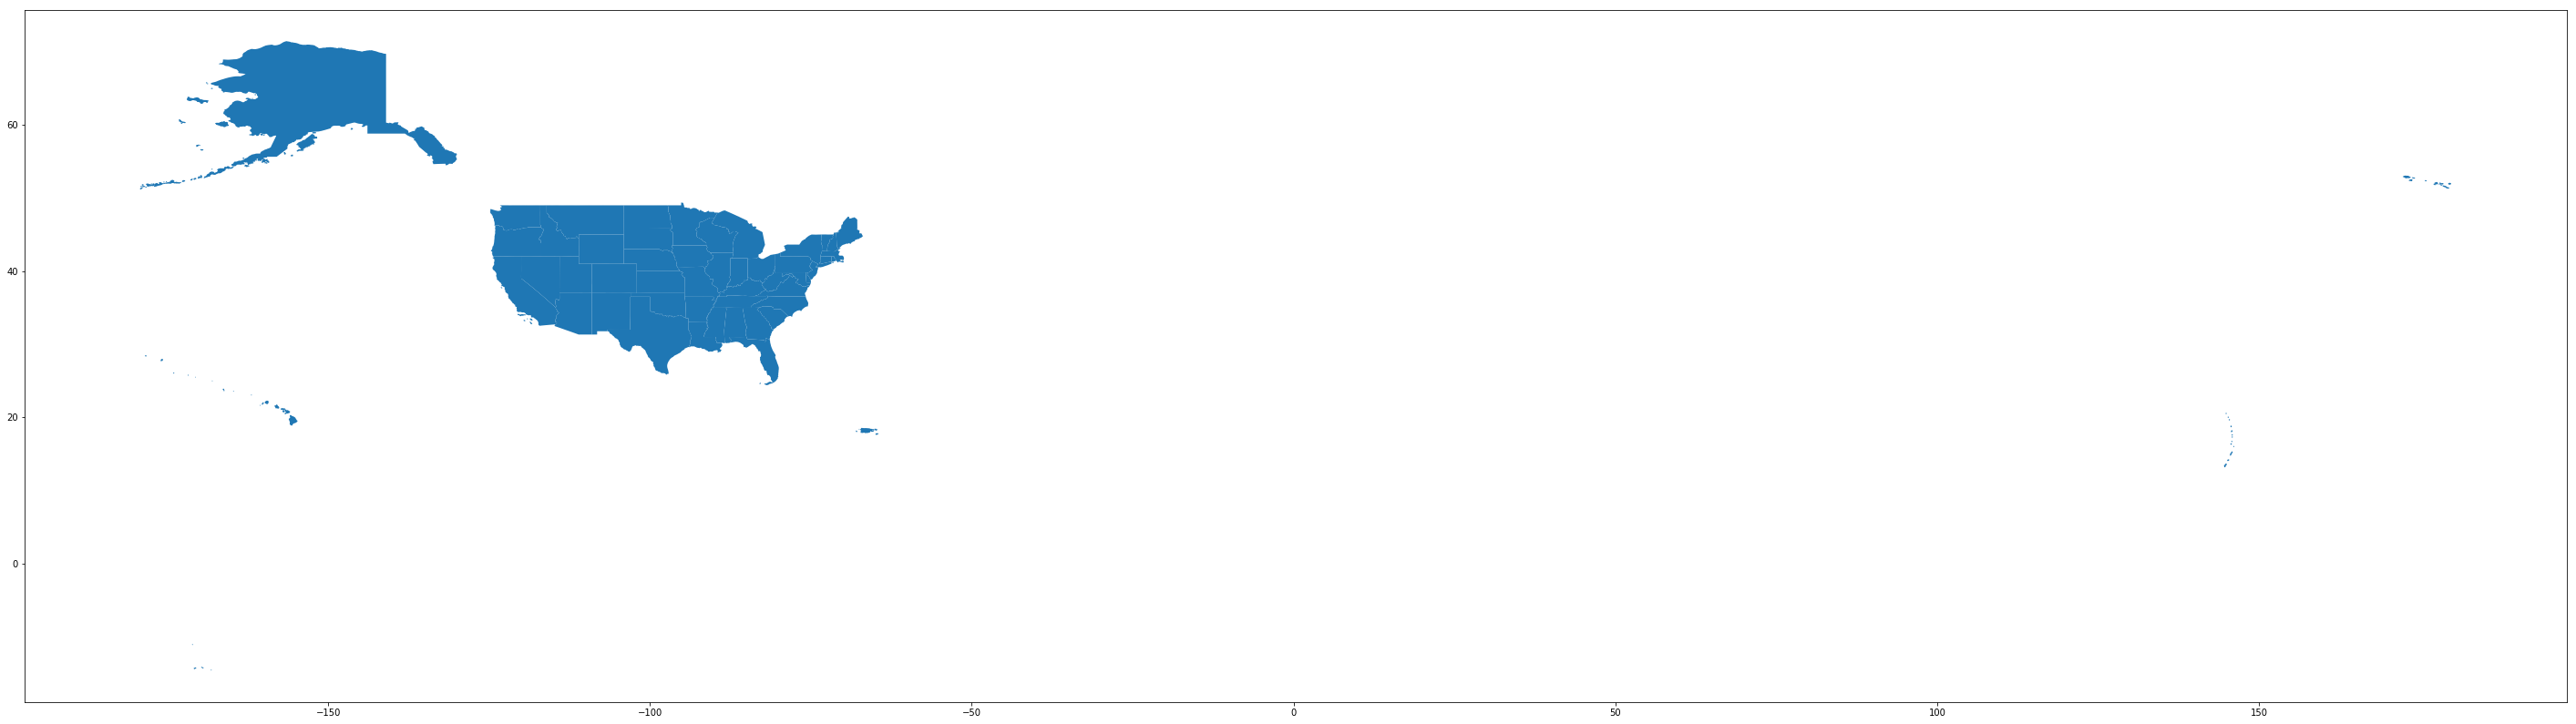

In [23]:
fig, ax = plt.subplots(figsize=(50,50))
us_map.plot(ax=ax)

In [24]:
type(merged_fire_data)

pandas.core.frame.DataFrame

In [25]:
rs = {'init':'epsg:4326'}
merged_fire_data.head()

,latitude,longitude,acq_date,frp
0,19.4537,-154.9889,2015-03-01,48.0
1,19.4140,-155.2819,2015-03-01,94.8
2,19.4101,-155.2605,2015-03-01,56.1
3,19.4120,-155.2772,2015-03-01,170.3
4,26.6062,-80.9052,2015-03-01,12.7


In [26]:
geometry = [Point(xy) for xy in zip(merged_fire_data['longitude'], merged_fire_data['latitude'])]
geometry[:3]

In [27]:
geo_df = gpd.GeoDataFrame(merged_fire_data, crs=rs, geometry=geometry)
geo_df.head()

/home/pseudocodenerd/anaconda3/envs/torch/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,latitude,longitude,acq_date,frp,geometry
0,19.4537,-154.9889,2015-03-01,48.0,POINT (-154.98890 19.45370)
1,19.4140,-155.2819,2015-03-01,94.8,POINT (-155.28190 19.41400)
2,19.4101,-155.2605,2015-03-01,56.1,POINT (-155.26050 19.41010)
3,19.4120,-155.2772,2015-03-01,170.3,POINT (-155.27720 19.41200)
4,26.6062,-80.9052,2015-03-01,12.7,POINT (-80.90520 26.60620)


In [ ]:
fig, axx = plt.subplots(figsize=(50,50))
us_map.plot(ax=axx, alpha=0.4, color="grey")
geo_df[geo_df[]]
# abandoned

In [28]:
merged_fire_data.drop(columns=['geometry'])

,latitude,longitude,acq_date,frp
0,19.4537,-154.9889,2015-03-01,48.0
1,19.4140,-155.2819,2015-03-01,94.8
2,19.4101,-155.2605,2015-03-01,56.1
3,19.4120,-155.2772,2015-03-01,170.3
4,26.6062,-80.9052,2015-03-01,12.7
...,...,...,...,...
70665,46.3240,-116.3640,2020-09-30,95.7
70666,37.2160,-119.2170,2020-09-30,14.0
70667,20.9500,-156.6500,2020-09-30,54.4
70668,19.2190,-155.3630,2020-09-30,15.8


In [29]:
final_json_data = merged_fire_data.drop(columns=['geometry'])

In [30]:
print(final_json_data.shape[0])

752224


In [31]:
final_json_data.count()

latitude     752224
longitude    752224
acq_date     752224
frp          752224
dtype: int64

In [43]:
fire_data_final = merged_fire_data.rename(columns={"latitude":"Latitude", "longitude":"Longitude", "acq_date":"Date", "frp": "Fire Intensity", 'brightness':"Brightness"})

In [52]:
fire_data_final.head()

,Latitude,Longitude,Date,Fire Intensity,Brightness
0,19.4537,-154.9889,2015-03-01,48.0,310.5
1,19.4140,-155.2819,2015-03-01,94.8,327.6
2,19.4101,-155.2605,2015-03-01,56.1,316.3
3,19.4120,-155.2772,2015-03-01,170.3,342.6
4,26.6062,-80.9052,2015-03-01,12.7,321.4


In [53]:
fire_data_final.to_csv('bhai.csv')

---

In [55]:
final_csv = pd.read_csv('bhai.csv', index_col=[0])
final_csv.head()

,Latitude,Longitude,Date,Fire Intensity,Brightness
0,19.4537,-154.9889,2015-03-01,48.0,310.5
1,19.4140,-155.2819,2015-03-01,94.8,327.6
2,19.4101,-155.2605,2015-03-01,56.1,316.3
3,19.4120,-155.2772,2015-03-01,170.3,342.6
4,26.6062,-80.9052,2015-03-01,12.7,321.4


count no of active fires per date 

In [66]:
final_csv.pivot_table(index=['Date'], aggfunc='size')

Date
2015-03-01      19
2015-03-02      60
2015-03-03     121
2015-03-04     122
2015-03-05     158
              ... 
2020-09-26     628
2020-09-27     581
2020-09-28    1888
2020-09-29     850
2020-09-30    1310
Length: 2041, dtype: int64

In [67]:
fire_count = final_csv['Date'].value_counts()

In [68]:
fire_count

2020-09-09    5794
2015-06-25    5274
2020-09-08    4878
2017-09-04    4171
2020-09-10    3924
              ... 
2018-12-25       9
2018-12-09       8
2019-12-29       6
2019-12-28       5
2019-02-10       1
Name: Date, Length: 2041, dtype: int64

In [82]:
fire_count_df = fire_count.to_frame().reset_index().rename(columns={'index': 'Date', 'Date': 'Fires Spotted'}).sort_values(by='Date', ascending=True)
fire_count_df = fire_count_df.reset_index()
fire_count_df

,index,Date,Fires Spotted
0,2026,2015-03-01,19
1,1897,2015-03-02,60
2,1645,2015-03-03,121
3,1641,2015-03-04,122
4,1460,2015-03-05,158
...,...,...,...
2036,274,2020-09-26,628
2037,322,2020-09-27,581
2038,26,2020-09-28,1888
2039,164,2020-09-29,850


In [83]:
final_csv

,Latitude,Longitude,Date,Fire Intensity,Brightness
0,19.4537,-154.9889,2015-03-01,48.0,310.5
1,19.4140,-155.2819,2015-03-01,94.8,327.6
2,19.4101,-155.2605,2015-03-01,56.1,316.3
3,19.4120,-155.2772,2015-03-01,170.3,342.6
4,26.6062,-80.9052,2015-03-01,12.7,321.4
...,...,...,...,...,...
70665,46.3240,-116.3640,2020-09-30,95.7,350.6
70666,37.2160,-119.2170,2020-09-30,14.0,321.7
70667,20.9500,-156.6500,2020-09-30,54.4,349.9
70668,19.2190,-155.3630,2020-09-30,15.8,325.4


In [77]:
# group alculate mean for frp and birghtness
meaned_data = final_csv.groupby('Date')['Fire Intensity', 'Brightness'].mean().reset_index()
meaned_data

/home/pseudocodenerd/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Date,Fire Intensity,Brightness
0,2015-03-01,37.121053,314.073684
1,2015-03-02,24.523333,315.118333
2,2015-03-03,54.557851,316.567769
3,2015-03-04,21.311475,316.383607
4,2015-03-05,37.188608,314.433544
...,...,...,...
2036,2020-09-26,219.260987,355.304459
2037,2020-09-27,148.655250,333.974182
2038,2020-09-28,95.762235,341.757521
2039,2020-09-29,93.472000,329.759294


In [78]:
# fires_count_df and _meaned data

In [87]:
fire_count_df

,index,Date,Fires Spotted
0,2026,2015-03-01,19
1,1897,2015-03-02,60
2,1645,2015-03-03,121
3,1641,2015-03-04,122
4,1460,2015-03-05,158
...,...,...,...
2036,274,2020-09-26,628
2037,322,2020-09-27,581
2038,26,2020-09-28,1888
2039,164,2020-09-29,850


In [80]:
meaned_data

,Date,Fire Intensity,Brightness
0,2015-03-01,37.121053,314.073684
1,2015-03-02,24.523333,315.118333
2,2015-03-03,54.557851,316.567769
3,2015-03-04,21.311475,316.383607
4,2015-03-05,37.188608,314.433544
...,...,...,...
2036,2020-09-26,219.260987,355.304459
2037,2020-09-27,148.655250,333.974182
2038,2020-09-28,95.762235,341.757521
2039,2020-09-29,93.472000,329.759294



---

### new start

In [106]:
fire = pd.read_csv('bhai.csv', index_col=[0])
df = pd.read_csv('bhai.csv', index_col=[0])
fire.head()

,Latitude,Longitude,Date,Fire Intensity,Brightness
0,19.4537,-154.9889,2015-03-01,48.0,310.5
1,19.4140,-155.2819,2015-03-01,94.8,327.6
2,19.4101,-155.2605,2015-03-01,56.1,316.3
3,19.4120,-155.2772,2015-03-01,170.3,342.6
4,26.6062,-80.9052,2015-03-01,12.7,321.4


TO DO: EXTRACT LA REGION ROWS

In [122]:
# la coords 34.0522° N, 118.2437° W
la_lat = 34.0522
la_long = -118.2437

In [123]:
from math import sin, cos, sqrt, atan2,radians

In [124]:
def getDist(lat1,lon1,lat2,lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [138]:
fire['dist']=list(map(lambda k: getDist(fire.loc[k]['Latitude'],fire.loc[k]['Longitude'],la_lat,la_long), fire.index))

TypeError: cannot convert the series to <class 'float'>

In [141]:
#Initialize DataFrame
df=pd.DataFrame(columns=['location','lat','lon'])
df['location']=['LA','NY','LV']
df['lat']=[34.05,40.71,36.16]
df['lon']=[-118.24,-74.00,-115.14]

#New point Reno 39.53,-119.81
newlat=39.53
newlon=-119.81

#Import trig stuff from math
from math import sin, cos, sqrt, atan2,radians

#Distance function between two lat/lon
def getDist(lat1,lon1,lat2,lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

#Apply distance function to dataframe
df['dist']=list(map(lambda k: getDist(df.loc[k]['lat'],df.loc[k]['lon'],newlat,newlon), df.index))

#This will give all locations within radius of 600 km
df[df['dist']<580]

,location,lat,lon,dist
2,LV,36.16,-115.14,555.511724


In [144]:
df = pd.read_csv('training_data.csv')
#New point Reno 39.53,-119.81
newlat=39.53
newlon=-119.81

#Import trig stuff from math
from math import sin, cos, sqrt, atan2,radians

#Distance function between two lat/lon
def getDist(lat1,lon1,lat2,lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

#Apply distance function to dataframe
df['dist']=list(map(lambda k: getDist(df.loc[k]['Latitude'],df.loc[k]['Longitude'],newlat,newlon), df.index))

#This will give all locations within radius of 600 km
df[df['dist']<580]

,Unnamed: 0,Latitude,Longitude,Date,Fire Intensity,Brightness,dist
9,9,42.2387,-120.1049,2015-03-01,20.6,308.4,302.306522
10,10,37.0068,-120.7126,2015-03-01,21.3,314.6,291.508819
11,11,36.6814,-120.6262,2015-03-01,11.7,307.2,324.797927
14,14,39.2122,-122.2398,2015-03-01,41.0,314.8,211.892526
15,15,39.2166,-122.2482,2015-03-01,67.0,320.5,212.517339
...,...,...,...,...,...,...,...
752214,70660,40.2560,-123.1200,2020-09-30,117.6,365.2,293.771389
752215,70661,38.6380,-122.5370,2020-09-30,49.6,344.1,255.483226
752216,70662,39.8770,-121.3220,2020-09-30,63.6,352.4,135.022601
752218,70664,40.2340,-123.2990,2020-09-30,30.7,331.4,307.899512


In [161]:
df = pd.read_csv('training_data.csv')

In [162]:
df

,Unnamed: 0,Latitude,Longitude,Date,Fire Intensity,Brightness
0,0,19.4537,-154.9889,2015-03-01,48.0,310.5
1,1,19.4140,-155.2819,2015-03-01,94.8,327.6
2,2,19.4101,-155.2605,2015-03-01,56.1,316.3
3,3,19.4120,-155.2772,2015-03-01,170.3,342.6
4,4,26.6062,-80.9052,2015-03-01,12.7,321.4
...,...,...,...,...,...,...
752219,70665,46.3240,-116.3640,2020-09-30,95.7,350.6
752220,70666,37.2160,-119.2170,2020-09-30,14.0,321.7
752221,70667,20.9500,-156.6500,2020-09-30,54.4,349.9
752222,70668,19.2190,-155.3630,2020-09-30,15.8,325.4


# LOS ANGELES
## PHOENIX
## Oregon

In [259]:
# newlat = 34.0522
# newlon = -118.2437
# newlat = 33.4484
# # newlon = -112.0740
# newlat = 38.408132
# newlon = -121.636534
# newlat=39.888955
# newlon=-105.957746
# newlat=46.430
# newlon=-114.724
# newlat=44.670
# newlon=-121.977
# newlat=31.657
# newlon=-89.086
newlat=47.608013
newlon=-122.335167

In [260]:
df = pd.read_csv('training_data.csv')

#Import trig stuff from math
from math import sin, cos, sqrt, atan2,radians

#Distance function between two lat/lon
def getDist(lat1,lon1,lat2,lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

#Apply distance function to dataframe
df['dist']=list(map(lambda k: getDist(df.loc[k]['Latitude'],df.loc[k]['Longitude'],newlat,newlon), df.index))

#This will give all locations within radius of 600 km
LA_DATA = df[df['dist']<=200]

In [261]:
f = LA_DATA

In [262]:
f

,Unnamed: 0,Latitude,Longitude,Date,Fire Intensity,Brightness,dist
4261,4261,47.5659,-122.3778,2015-03-16,4.0,300.7,5.671999
12469,12469,47.5685,-122.3649,2015-04-01,6.3,303.4,4.928651
18317,18317,47.5673,-122.3668,2015-04-19,5.4,310.9,5.112630
18374,18374,47.5694,-122.3754,2015-04-19,5.6,310.5,5.249383
20402,20402,47.5672,-122.3695,2015-04-26,5.3,306.4,5.219412
...,...,...,...,...,...,...,...
723571,42017,47.1520,-121.8400,2020-09-09,19.3,322.0,62.957139
725378,43824,47.1540,-121.8450,2020-09-10,7.5,304.8,62.554660
726623,45069,47.1620,-121.8430,2020-09-10,8.0,306.3,61.926899
729454,47900,47.5740,-122.3680,2020-09-12,5.1,300.1,4.514348


In [263]:
# EXPERICMENT TO REMOVE LATITUDE LONGITUDE MAY HAVE BREAKING RESULTS
f = f.groupby('Date').mean().reset_index()
f = f.loc[:, ~LA_DATA.columns.str.contains('^Unnamed')]
f = f.drop(columns=['dist'])
f

,Unnamed: 0,Latitude,Longitude,Fire Intensity,Brightness
0,4261.000000,47.565900,-122.377800,4.000000,300.700000
1,12469.000000,47.568500,-122.364900,6.300000,303.400000
2,18345.500000,47.568350,-122.371100,5.500000,310.700000
3,20402.000000,47.567200,-122.369500,5.300000,306.400000
4,24724.000000,47.572700,-122.367400,7.700000,312.800000
...,...,...,...,...,...
272,34753.600000,47.122733,-122.368267,58.206667,328.346667
273,41376.833333,47.110833,-122.102833,15.083333,320.050000
274,44446.500000,47.158000,-121.844000,7.750000,305.550000
275,47900.000000,47.574000,-122.368000,5.100000,300.100000


In [264]:
LA_DATA.to_csv('la_fire_data.csv')

---

### LA WEATHER

In [158]:
la_weather_data = pd.read_csv('city_weather_data/Los+Angeles.csv')
la_weather_data.head()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2016-01-01,8,5,0.0,1020,18
1,1,2016-01-02,9,11,0.0,1018,19
2,2,2016-01-03,8,15,0.0,1014,16
3,3,2016-01-04,11,7,0.1,1020,19
4,4,2016-01-05,12,19,14.1,1008,13


la weather starts from 2016 tho our fire data starts from 2015 so changing
toototot